In [3]:
%matplotlib notebook
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import *
def funW(arg):
    u_1,u_2,u_3,Theta   = arg
    # Update chemical constants with new temperature
    m = 0.9 + 0.89*(1-XO2) + 0.066*(1-XO2)**2
    rho = sigma*M/Theta
    kH = rho**2*exp(b1) 
    kHO2 = rho**2*exp(b1)/XO2
    kO2 = rho**2/XO2
    kH2O = rho**2/XH2O
    
    alpha1 = 2*exp(b1*(1-1/Theta)) - R15*Theta**(-1.8)*m
    alpha2 = (R17*exp(-b17/Theta) - R19*exp(-b19/Theta) + R21*exp(-b21/Theta))
    alpha3 = - M*R1725*Theta**(-1.6)*exp((b5-b17)/Theta)
    alpha4 = - 2*R9*Theta**(-2)*m
    beta1 = R15*Theta**(-1.8)*m
    beta2 = - (R17*exp(-b17/Theta) + R19*exp(-b19/Theta) + R21*exp(-b21/Theta))
    beta3 = - M*exp(b1*(1-1/Theta))*Theta**(-1.6)*(R525*exp(b5/Theta) + R323*Theta**(-1.07)*exp((b3-b23)/Theta))
    beta4 = - M*R1725*Theta**(-1.6)*exp((b5-b17)/Theta)
    beta5 = - R27*exp(-b27/Theta)
    gamma1 = -(exp(b1*(1-1/Theta)) + R15*Theta**(-1.8)*m)
    gamma2 = R19*exp(-b19/Theta)
    gamma3 = M*R1725*Theta**(-1.6)*exp((b5-b17)/Theta)
    delta1 = 2*exp(b1*(1-1/Theta))
    delta2 = 2*(R17*exp(-b17/Theta) + R21*exp(-b21/Theta))
    delta3 = M*R1725*Theta**(-1.6)*exp((b5-b17)/Theta)

    # ================================================================================

    rH = kH*(u_1*u_3*alpha1 + u_1*u_2*alpha2 + u_1*u_2*u_2*alpha3 + u_1*u_1*alpha4)
    rHO2 = kHO2*(u_1*u_3*beta1 + u_1*u_2*beta2 + u_1*u_2*u_3*beta3 + u_1*u_2*u_2*beta4 + u_1*u_1*beta5)
    rO2 = kO2*(u_1*u_3*gamma1 + u_1*u_2*gamma2 + u_1*u_2*u_2*gamma3)
    rH2O = kH2O*(u_1*u_3*delta1 + u_1*u_2*delta2 + u_1*u_2*u_2*delta3)
    return np.array([rH, rHO2, rO2, rH2O])

<IPython.core.display.Javascript object>


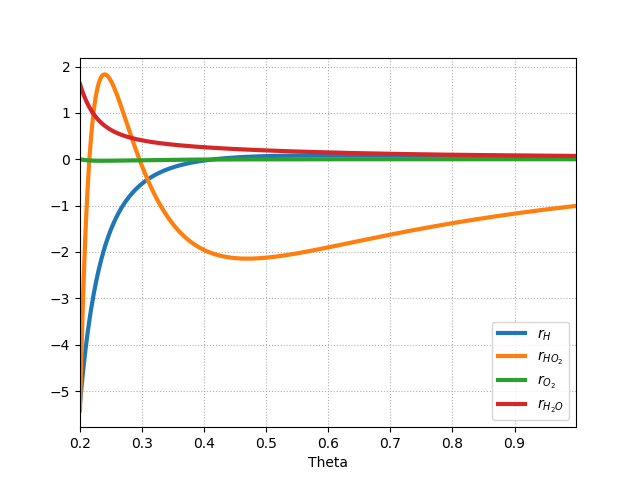

interactive(children=(FloatSlider(value=0.03, description='nH', max=1.0, step=0.01), FloatSlider(value=0.4, de…

<function __main__.update(nH=0.03, nHO2=0.4, nO2=0.02)>

In [7]:
sigma   = 0.191 # T_0/T_ad
# Theta   = 0.8  # 0.2 ... 1.0
b1,b3,b5,b17,b19,b21,b23,b27 = 5.4,2.03,1.06,0.32,0.22,0.56,-0.13,-0.4
R1,R17,R19,R21,R15,R9,R27,R1725,R525,R323 = 1.0,0.75,0.125,0.15,0.61,0.006,0.0002,0.004,0.006,0.0007
M      = 1.09
# m       = 0.8  
XO2     = 0.078
XH2O    = 0.01
q_H2O   = -5.5
q_H     = -4.5

fig, ax = plt.subplots()
# plt.subplots_adjust(bottom=0.25)
# plt.ylim([-1,2])
# plt.xlim([0.2, 1])

n = np.arange(0.2, 1.0, 0.001)
x,y,z = 0.03, 0.4, 0.02
W = funW([x,y,z,n])
one, = plt.plot(n,W[0], label='$r_H$', lw=3)
two, = plt.plot(n,W[1], label='$r_{HO_2}$', lw=3)
three, = plt.plot(n,W[2], label='$r_{O_2}$', lw=3)
four, = plt.plot(n,W[3], label='$r_{H_2O}$', lw=3)
ax.grid(True, linestyle=':')
ax.margins(x=0)
ax.set_xlabel('Theta')
# plt.yscale('log') #LogScale
plt.legend(loc='best')

def update(nH=0.03,nHO2=0.4,nO2=0.02):
    W = funW([nH,nHO2,nO2,n])
    one.set_ydata(W[0])
    two.set_ydata(W[1])
    three.set_ydata(W[2])
    four.set_ydata(W[3])
    ax.relim()
    # update ax.viewLim using the new dataLim
    ax.autoscale_view()
    fig.canvas.draw_idle()
interact(update, nH=(0.0,1.0,0.01), nHO2=(0.0,1.0,0.01), nO2=(0.0,0.2,0.01))

